In [1]:
import cv2
from datetime import datetime
import sys

In [2]:
image_path = './face_1.jpeg'
image = cv2.imread(image_path)

In [3]:
# 获取训练好的人脸的参数数据，这里直接从GitHub上使用默认值。gitbub文件
face_cascade = cv2.CascadeClassifier("./models/haarcascade_frontalface_alt2.xml")

In [4]:
#灰度处理
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 探测图片中的人脸
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=4, minSize=(30, 30),flags=cv2.CASCADE_SCALE_IMAGE)

In [5]:
vis = image.copy()
for x1, y1, x2, y2 in faces: # x2,y2 为x1，y1 的偏离位置
    x2 = x2 + x1
    y2 = y2 + y1
    cv2.rectangle(vis, (x1, y1), (x2, y2), (0,255,0), 2)
    print("Detection : x1: {} y1: {} x2: {} y2: {}".format(
       x1, y1, x2, y2))

Detection : x1: 448 y1: 88 x2: 655 y2: 295


In [6]:
print ("发现{0}个人脸!".format(len(faces)))

发现1个人脸!


In [7]:
#cv2.imshow("Image",image)

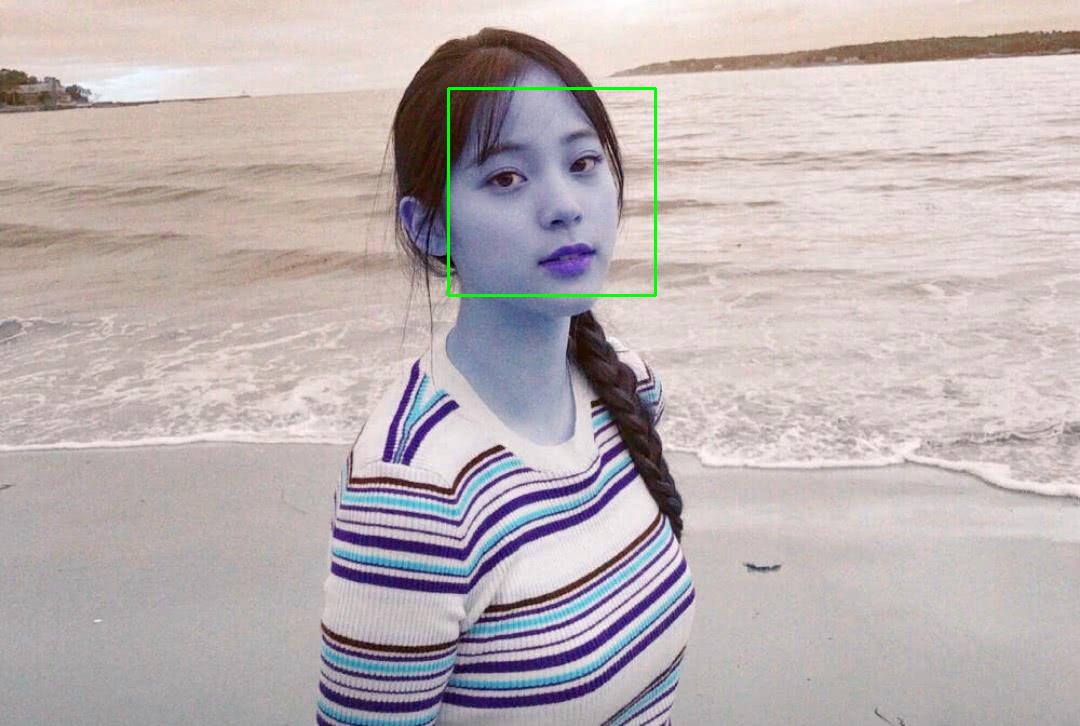

In [8]:
from PIL import Image
Image.fromarray(vis)

In [9]:
print('version:',cv2.__version__)
from cv2 import dnn

version: 3.4.1


In [10]:
#TF
#modelFile = './models/opencv_face_detector_uint8.pb'
#configFile = './models/opencv_face_detector.pbtxt'
#net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)
#CAFF
modelFile = './model/res10_300x300_ssd_iter_140000.caffemodel'
configFile = './model/deploy.prototxt'
net = cv2.dnn.readNetFromCaffe(configFile,modelFile)

In [11]:
inWidth = 300
inHeight = 300
confThreshold = 0.5

image = cv2.imread('./face_x01.jpg')

cols = image.shape[1]
rows = image.shape[0]

In [12]:
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300,300)), 1.0,(300,300), (104.0, 177.0, 123.0))
net.setInput(blob)

detections = net.forward()
perf_stats = net.getPerfProfile()
print('Inference time, ms: %.2f' % (perf_stats[0] / cv2.getTickFrequency() * 1000))

Inference time, ms: 36.49


In [13]:
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > confThreshold:
        x1 = int(detections[0, 0, i, 3] * cols)
        y1 = int(detections[0, 0, i, 4] * rows)
        x2 = int(detections[0, 0, i, 5] * cols)
        y2 = int(detections[0, 0, i, 6] * rows)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255))

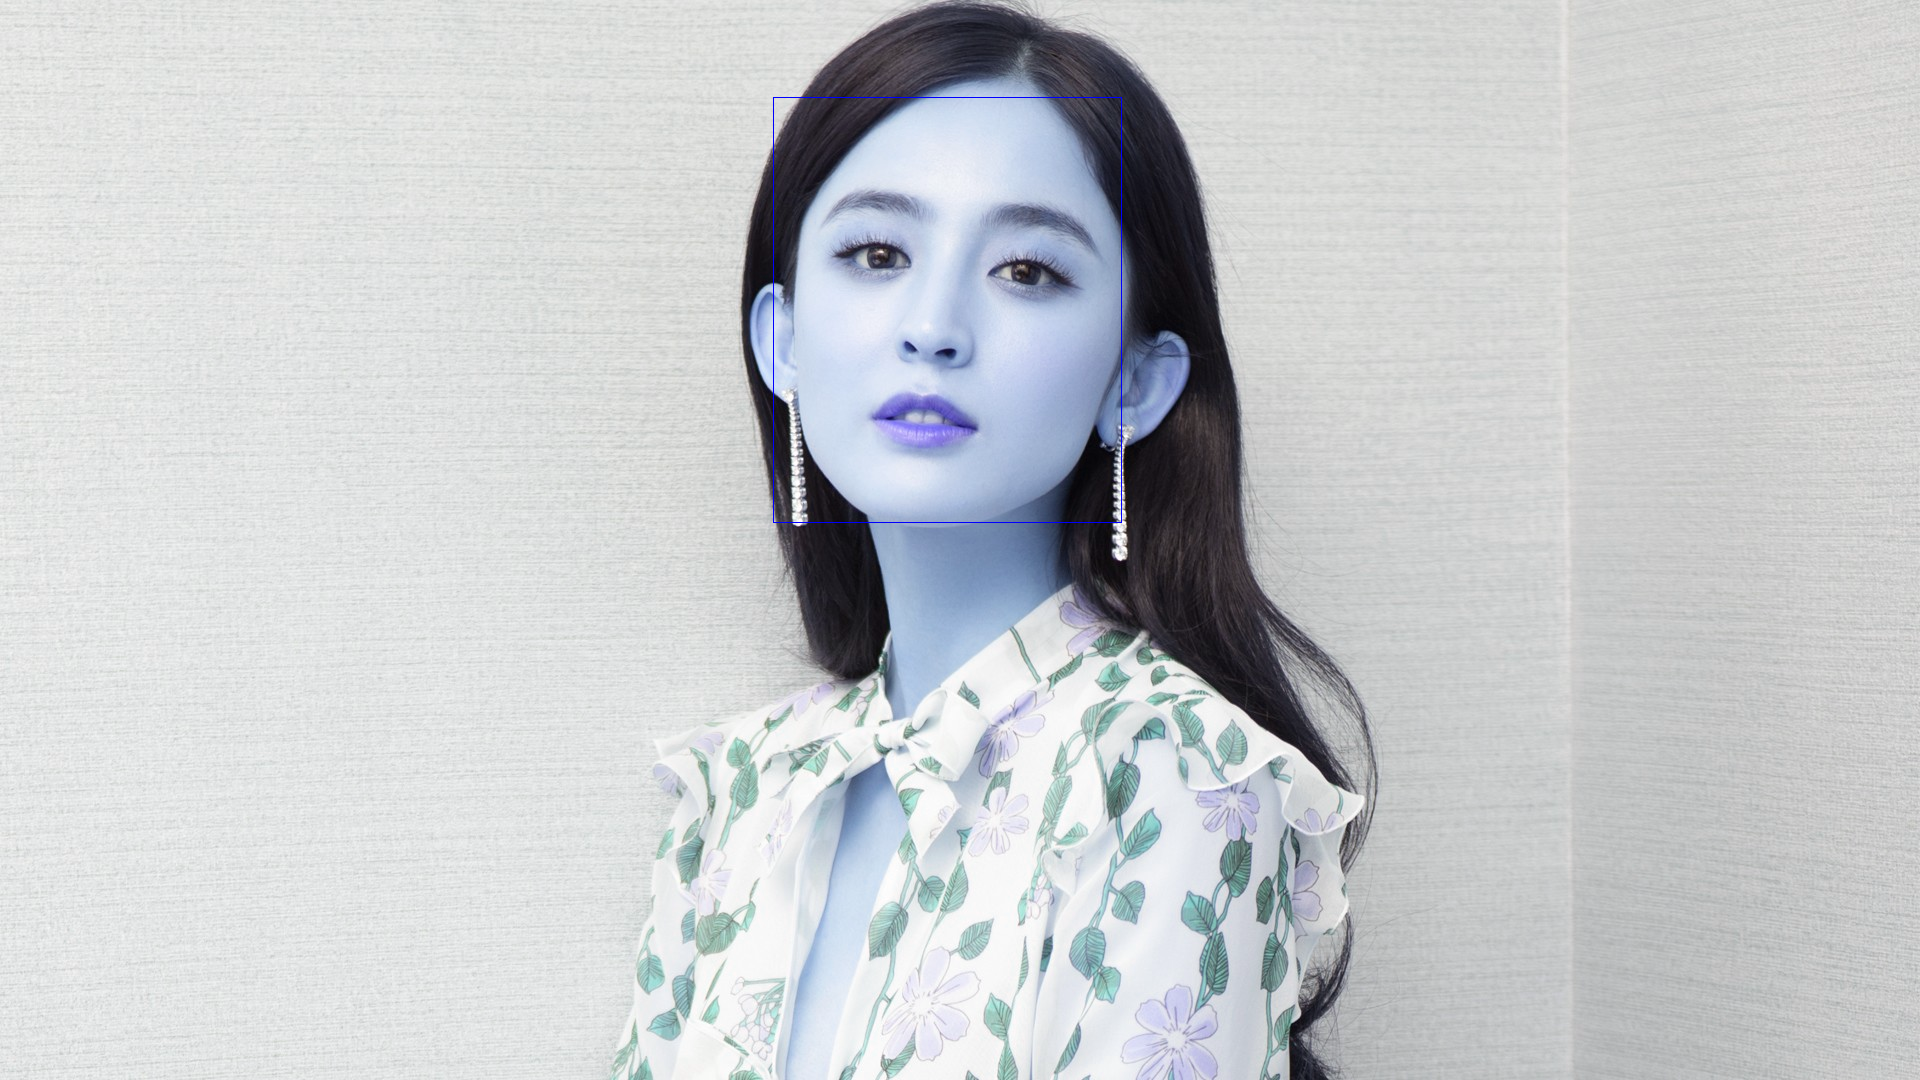

In [14]:
from PIL import Image
Image.fromarray(image)